In [95]:
import pandas as pd

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn import preprocessing
from sklearn import model_selection 
from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from time import time

In [96]:
# For reproducibility
RANDOM_SEED = 12345


#Read .csv from provided dataset
csv_filename="Indian Liver Patient Dataset (ILPD).csv"
df=pd.read_csv(csv_filename, names=["Age","Gender","TB","DB","Alkphos","Sgpt","Sgot","TP","ALB","A/G","LiverResult"])

In [97]:
#Convert Gender,Selector to numbericals
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df.Gender)
df['LiverResult'] = le.fit_transform(df.LiverResult)

#Removing the Selector column from the list of the features
features=(list(df.columns[:-1]))

#Retrieving the features and Selector data into X & y
X = df[features]
y = df['LiverResult']

#Fitting the features
X = Imputer().fit_transform(X)

#Split dataset to 60% training and 40% testing ran-dom_state
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

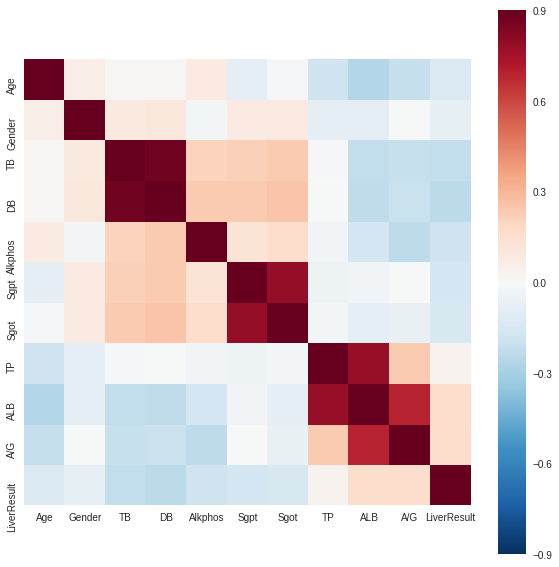

In [98]:
correlation_matrix = df.corr()
plt.subplots(figsize = (10, 10))

sns.heatmap(correlation_matrix, vmax = .9, square = True)
plt.show()

In [99]:
########SVM
#Loading the SVM Classifier, Fitting the training sets to get the classification model, 
#Getting the prediction vetor 'svm_predictions' of the model, and Computing the Confusion Matrix
t0 = time()
svc = SVC()
clf_svc=svc.fit(X_train, y_train)
svm_predictions = clf_svc.predict(X_test)
svm_cnf_matrix = confusion_matrix(y_test, svm_predictions)
t1 = time()

#Printing the results of our SVM classifier 
print ("\nSVM")
print ("\nAcurracy:\n\t ", clf_svc.score(X_test,y_test) )
print("\nConfusion Matrix:\n",svm_cnf_matrix)
print("\nClassification Report:\n",classification_report(y_test,svm_predictions))
print ("Time Elapsed: ", t1-t0)


SVM

Acurracy:
	  0.702857142857

Confusion Matrix:
 [[122   0]
 [ 52   1]]

Classification Report:
              precision    recall  f1-score   support

          0       0.70      1.00      0.82       122
          1       1.00      0.02      0.04        53

avg / total       0.79      0.70      0.59       175

Time Elapsed:  0.019798994064331055


In [100]:
########Neural Network
#Loading the Neural Network Classifier, Fitting the training sets to get the classification model, 
#Getting the prediction vetor 'mlp_predictions' of the model, and Computing the Confusion Matrix
t0 = time()
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10),random_state=0)
clf_mlp = mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)
mlp_cnf_matrix = confusion_matrix(y_test,mlp_predictions)
t1 = time()


#Printing the results of our Neural Network classifier 
print ("\nNeural Network")
print ("\nAcurracy:\n\t ", clf_mlp.score(X_test,y_test) )
print("\nConfusion Matrix:\n",mlp_cnf_matrix)
print("\nClassification Report:\n",classification_report(y_test,mlp_predictions))
print ("Time Elapsed: ", t1-t0)


Neural Network

Acurracy:
	  0.582857142857

Confusion Matrix:
 [[96 26]
 [47  6]]

Classification Report:
              precision    recall  f1-score   support

          0       0.67      0.79      0.72       122
          1       0.19      0.11      0.14        53

avg / total       0.52      0.58      0.55       175

Time Elapsed:  0.12709736824035645


In [101]:
######## K Nearest Neighbors (KNN)
t0 = time()
knn = KNeighborsClassifier(n_neighbors=3)
clf_knn=knn.fit(X_train, y_train)
knn_pred = clf_knn.predict(X_test)
knn_cnf_matrix = confusion_matrix(y_test, knn_pred)
t1 = time()

#Printing the results of our classifier 
print ("\nKNN")
print ("\nAcurracy:\n\t ", clf_knn.score(X_test,y_test) )
print("\nConfusion Matrix:\n",knn_cnf_matrix)
print("\nClassification Report:\n",classification_report(y_test,knn_pred))
print ("Time Elapsed: ", t1-t0)


KNN

Acurracy:
	  0.68

Confusion Matrix:
 [[101  21]
 [ 35  18]]

Classification Report:
              precision    recall  f1-score   support

          0       0.74      0.83      0.78       122
          1       0.46      0.34      0.39        53

avg / total       0.66      0.68      0.66       175

Time Elapsed:  0.0056383609771728516


In [102]:
############Random Forest
t0 = time()
rf = RandomForestClassifier(n_estimators = 15, n_jobs = 2)
clf_rf = rf.fit(X_train, y_train)
rf_pred = clf_rf.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, rf_pred)
t1 = time()

print ("\nRandom Forest")
print ("\nAcurracy:\n\t", clf_rf.score(X_test,y_test))
print("\nConfusion Matrix:\n",rf_cnf_matrix)
print("\nClassification Report:\n",classification_report(y_test,rf_pred))
print ("Time Elapsed: ", t1-t0)


Random Forest

Acurracy:
	 0.668571428571

Confusion Matrix:
 [[102  20]
 [ 38  15]]

Classification Report:
              precision    recall  f1-score   support

          0       0.73      0.84      0.78       122
          1       0.43      0.28      0.34        53

avg / total       0.64      0.67      0.65       175

Time Elapsed:  0.23772287368774414


In [103]:
############Log Regression
t0 = time()
lr = LogisticRegression(n_jobs=2, random_state=RANDOM_SEED,C=1,fit_intercept=True,penalty='l1')
clf_lr = lr.fit(X_train, y_train)
lr_pred = clf_lr.predict(X_test)
lr_cnf_matrix = confusion_matrix(y_test, lr_pred)
t1 = time()

print ("\nLog Regression")
print ("\nAcurracy:\n\t", clf_lr.score(X_test,y_test))
print("\nConfusion Matrix:\n",lr_cnf_matrix)
print("\nClassification Report:\n",classification_report(y_test,lr_pred))
print ("Time Elapsed: ", t1-t0)


Log Regression

Acurracy:
	 0.697142857143

Confusion Matrix:
 [[114   8]
 [ 45   8]]

Classification Report:
              precision    recall  f1-score   support

          0       0.72      0.93      0.81       122
          1       0.50      0.15      0.23        53

avg / total       0.65      0.70      0.64       175

Time Elapsed:  0.039031028747558594


In [104]:
##############Decision Tree
t0 = time()
dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
clf_dt=dt.fit(X_train, y_train)
dt_pred = clf_dt.predict(X_test)
dt_cnf_matrix = confusion_matrix(y_test, dt_pred)
t1 = time()

#Printing the results of our classifier 
print ("\nDecision Tree")
print ("\nAcurracy:\n\t ", clf_dt.score(X_test,y_test) )
print("\nConfusion Matrix:\n",dt_cnf_matrix)
print("\nClassification Report:\n",classification_report(y_test,dt_pred))
print ("Time Elapsed: ", t1-t0)


Decision Tree

Acurracy:
	  0.662857142857

Confusion Matrix:
 [[99 23]
 [36 17]]

Classification Report:
              precision    recall  f1-score   support

          0       0.73      0.81      0.77       122
          1       0.42      0.32      0.37        53

avg / total       0.64      0.66      0.65       175

Time Elapsed:  0.0050449371337890625


In [105]:
##############Naive Bayes
t0 = time()
nb = BernoulliNB()
clf_nb=nb.fit(X_train, y_train)
nb_pred = clf_nb.predict(X_test)
nb_cnf_matrix = confusion_matrix(y_test, nb_pred)
t1 = time()

#Printing the results of our classifier 
print ("\nNaive Bayes")
print ("\nAcurracy:\n\t ", clf_nb.score(X_test,y_test) )
print("\nConfusion Matrix:\n",nb_cnf_matrix)
print("\nClassification Report:\n",classification_report(y_test,nb_pred))
print ("Time Elapsed: ", t1-t0)


Naive Bayes

Acurracy:
	  0.697142857143

Confusion Matrix:
 [[122   0]
 [ 53   0]]

Classification Report:
              precision    recall  f1-score   support

          0       0.70      1.00      0.82       122
          1       0.00      0.00      0.00        53

avg / total       0.49      0.70      0.57       175

Time Elapsed:  0.0031659603118896484


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [106]:
matrices = {
    "SVM":svm_cnf_matrix,
    "Neural Network": mlp_cnf_matrix,
    "K Nearest Neighbors":knn_cnf_matrix,
    "Random Forest":rf_cnf_matrix,
    "Log Regression":lr_cnf_matrix,
    "Decision Tree":dt_cnf_matrix,
    "Naive Bayes":nb_cnf_matrix,}
acurracies = {
    "SVM":clf_svc.score(X_test,y_test),
    "Neural Network": clf_mlp.score(X_test,y_test),
    "K Nearest Neighbors":clf_knn.score(X_test,y_test),
    "Random Forest":clf_rf.score(X_test,y_test),
    "Log Regression":clf_lr.score(X_test,y_test),
    "Decision Tree":clf_dt.score(X_test,y_test),
    "Naive Bayes":clf_nb.score(X_test,y_test),}

In [107]:
#We use the function to plot the Confusion Matrix of each model
def draw_confusion_matrices(cms, classes):
    fig = plt.figure(figsize = (10, 15))
    
    i = 1   # used to compute the matrix location
    for clf_name, cm in cms.items():
        thresh = cm.max() / 2   # used for the text color
        
        ax = fig.add_subplot(len(cms) / 2 + 1, 2, i,
                             title = 'Confusion Matrix of %s' % clf_name, 
                             xlabel = 'Predicted',
                             ylabel = 'True')
        cax = ax.matshow(cm, cmap = plt.cm.Blues)
        fig.colorbar(cax)
        i += 1
        
        # Ticks
        ax.set_xticklabels([''] + classes)
        ax.set_yticklabels([''] + classes)
        ax.tick_params(labelbottom = True, labelleft = True, labeltop = False)
        
        # Text
        for x in range(len(cm)):
            for y in range(len(cm[0])):
                ax.text(y, x, cm[x, y], 
                        horizontalalignment = 'center', 
                        color = 'black' if cm[x, y] < thresh else 'white')
        
    plt.tight_layout()
    plt.show()

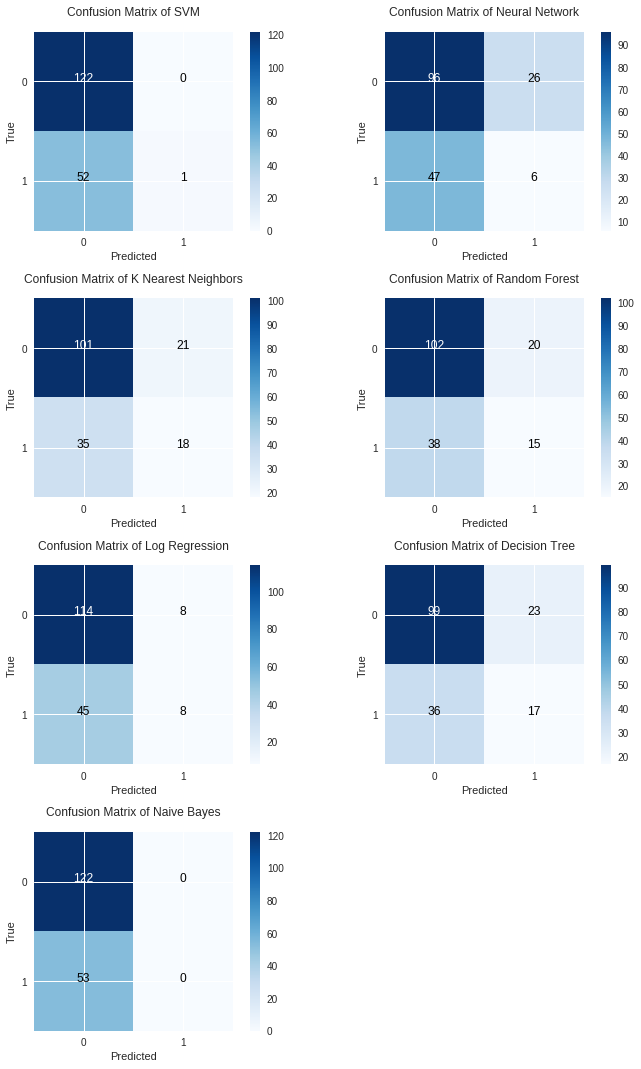

In [108]:
labels = np.unique(y).tolist()
draw_confusion_matrices(matrices, labels)